H0: Es gibt keinen Zusammenhang zwischen dem durchschnittlichen Wohlstand eines Landes (durchschnittliches GDP per capita 2000 bis 2019) und der durchschnittlichen relativen Flüchtlingsaufnahme (durchschnittlicher refugee_share 2000 bis 2019).

H1: Länder mit höherem durchschnittlichen Wohlstand haben im Durchschnitt eine andere (zum Beispiel höhere) relative Flüchtlingsaufnahme.

In [10]:
import pandas as pd
import numpy as np

# 1. Daten laden
path = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/output_csv_files/output_with_continent.csv"
df = pd.read_csv(path)

# 2. log(GDP) berechnen (brauchen wir später für Plots und Korrelation)
df["log_GDP"] = np.log(df["GDP_per_capita"])

# 3. Zeitraum filtern, zum Beispiel 2000 bis 2019
df_period = df[(df["Year"] >= 2000) & (df["Year"] <= 2019)]

print("Form vor Aggregation:", df_period.shape)

# 4. Pro Land und Kontinent Mittelwerte bilden
df_country = (
    df_period
    .groupby(["country", "continent"], as_index=False)
    .agg({
        "GDP_per_capita": "mean",
        "refugee_share": "mean"
    })
)

# 5. log(GDP) noch einmal, jetzt auf Länderebene
df_country["log_GDP"] = np.log(df_country["GDP_per_capita"])

print("Form nach Aggregation (eine Zeile pro Land):", df_country.shape)
df_country.head()


Form vor Aggregation: (2680, 11)
Form nach Aggregation (eine Zeile pro Land): (183, 5)


,country,continent,GDP_per_capita,refugee_share,log_GDP
0,Afghanistan,Asia,401.186287,0.001172,5.994426
1,Albania,Europe,3328.632745,0.000134,8.110317
2,Algeria,Africa,4072.478982,0.003427,8.312007
3,Angola,Africa,2796.325913,0.001040,7.936062
4,Antigua and Barbuda,North America,15687.100380,0.000036,9.660594


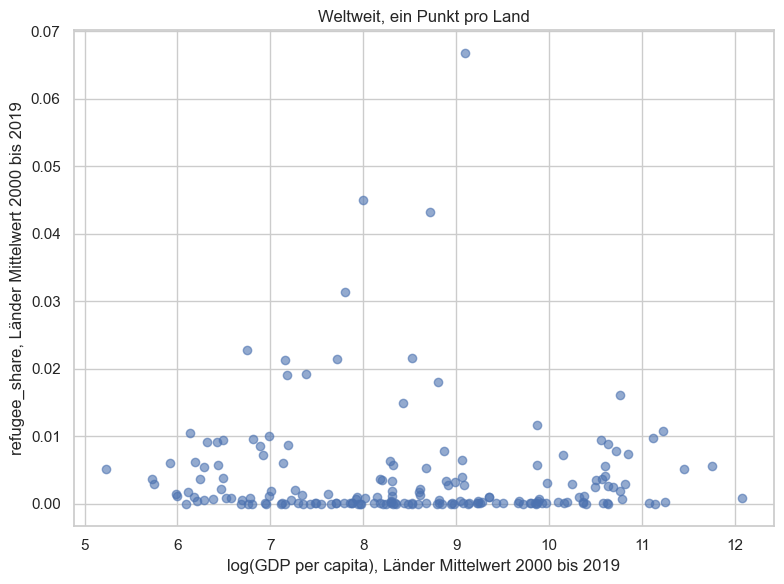

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8,6))
plt.scatter(df_country["log_GDP"], df_country["refugee_share"], alpha=0.6)

plt.xlabel("log(GDP per capita), Länder Mittelwert 2000 bis 2019")
plt.ylabel("refugee_share, Länder Mittelwert 2000 bis 2019")
plt.title("Weltweit, ein Punkt pro Land")

plt.tight_layout()
plt.show()


In [12]:
import numpy as np
from scipy.stats import t

# x = log(GDP) Mittelwert pro Land
x = df_country["log_GDP"].values

# y = refugee_share Mittelwert pro Land
y = df_country["refugee_share"].values

n = len(x)
print("Anzahl Länder:", n)

# Mittelwerte
x_mean = x.mean()
y_mean = y.mean()

# Steigung beta
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)
beta = numerator / denominator

# Achsenabschnitt alpha
alpha = y_mean - beta * x_mean

# Vorhersage & Residuen
y_hat = alpha + beta * x
residuals = y - y_hat

# Residuenvarianz sigma²
sigma_squared = np.sum(residuals**2) / (n - 2)

# Standardfehler der Steigung
SE_beta = np.sqrt(sigma_squared / denominator)

# t-Statistik
t_stat = beta / SE_beta

# p-Wert (zweiseitig)
p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-2))

# Ausgabe
print("\n=== Ergebnisse Welt (pro Land) ===")
print("Steigung beta:", beta)
print("Standardfehler:", SE_beta)
print("t-Statistik:", t_stat)
print("p-Wert:", p_value)
print("Achsenabschnitt alpha:", alpha)


Anzahl Länder: 183

=== Ergebnisse Welt (pro Land) ===
Steigung beta: -0.00024810787087506777
Standardfehler: 0.0003980211442295747
t-Statistik: -0.6233534938333868
p-Wert: 0.5338369557523
Achsenabschnitt alpha: 0.0060411397683263444


Da die geschätzte Steigung β = −0.00025 sehr klein ist und der zugehörige p-Wert von 0.53 deutlich über dem Signifikanzniveau liegt, kann die Nullhypothese nicht verworfen werden.
Es besteht weltweit kein statistisch nachweisbarer Zusammenhang zwischen dem durchschnittlichen Wohlstand eines Landes und seiner relativen Flüchtlingsaufnahme.

In [13]:
import numpy as np
from scipy.stats import t
import pandas as pd

continents = df_country["continent"].unique()

results = []

for cont in continents:
    print("\n==============================")
    print("Kontinent:", cont)
    print("==============================")
    
    sub = df_country[df_country["continent"] == cont]

    x = sub["log_GDP"].values
    y = sub["refugee_share"].values
    n = len(x)

    print("Anzahl Länder:", n)

    # Mittelwerte
    x_mean = x.mean()
    y_mean = y.mean()

    # Steigung beta
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2)
    beta = numerator / denominator

    # Achsenabschnitt alpha
    alpha = y_mean - beta * x_mean

    # Vorhersage und Residuen
    y_hat = alpha + beta * x
    residuals = y - y_hat

    # Residuenvarianz sigma²
    sigma_squared = np.sum(residuals**2) / (n - 2)

    # Standardfehler der Steigung
    SE_beta = np.sqrt(sigma_squared / denominator)

    # t-Statistik
    t_stat = beta / SE_beta

    # p-Wert (zweiseitig)
    p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-2))

    # Ausgabe
    print("Steigung beta:", beta)
    print("Standardfehler:", SE_beta)
    print("t-Statistik:", t_stat)
    print("p-Wert:", p_value)
    print("Achsenabschnitt:", alpha)

    # Speichern
    results.append([cont, beta, SE_beta, t_stat, p_value, alpha])

# Übersichtstabelle
results_df = pd.DataFrame(results, columns=["Kontinent", "beta", "SE_beta", "t_stat", "p_value", "alpha"])
results_df



Kontinent: Asia
Anzahl Länder: 44
Steigung beta: -0.0005447365864835699
Standardfehler: 0.0010883417216143681
t-Statistik: -0.5005198051909162
p-Wert: 0.619321929553293
Achsenabschnitt: 0.009305494651087463

Kontinent: Europe
Anzahl Länder: 39
Steigung beta: 0.0008925581900947875
Standardfehler: 0.0008079269957526498
t-Statistik: 1.1047510416003576
p-Wert: 0.27640004421435527
Achsenabschnitt: -0.004587585884918993

Kontinent: Africa
Anzahl Länder: 51
Steigung beta: -0.0005376709524632967
Standardfehler: 0.000821851297880256
t-Statistik: -0.6542192655168569
p-Wert: 0.5160295180274534
Achsenabschnitt: 0.008671083710550916

Kontinent: North America
Anzahl Länder: 26
Steigung beta: 0.00030920334199340454
Standardfehler: 0.0002524336837430639
t-Statistik: 1.224889394349301
p-Wert: 0.23250349894180777
Achsenabschnitt: -0.0021545300113921095

Kontinent: South America
Anzahl Länder: 12
Steigung beta: -0.0002643817828512252
Standardfehler: 0.0012377807077216302
t-Statistik: -0.2135933943726348

,Kontinent,beta,SE_beta,t_stat,p_value,alpha
0,Asia,-0.000545,0.001088,-0.500520,0.619322,0.009305
1,Europe,0.000893,0.000808,1.104751,0.276400,-0.004588
2,Africa,-0.000538,0.000822,-0.654219,0.516030,0.008671
3,North America,0.000309,0.000252,1.224889,0.232503,-0.002155
4,South America,-0.000264,0.001238,-0.213593,0.835156,0.003185
5,Oceania,0.002834,0.006044,0.468939,0.650265,-0.018040


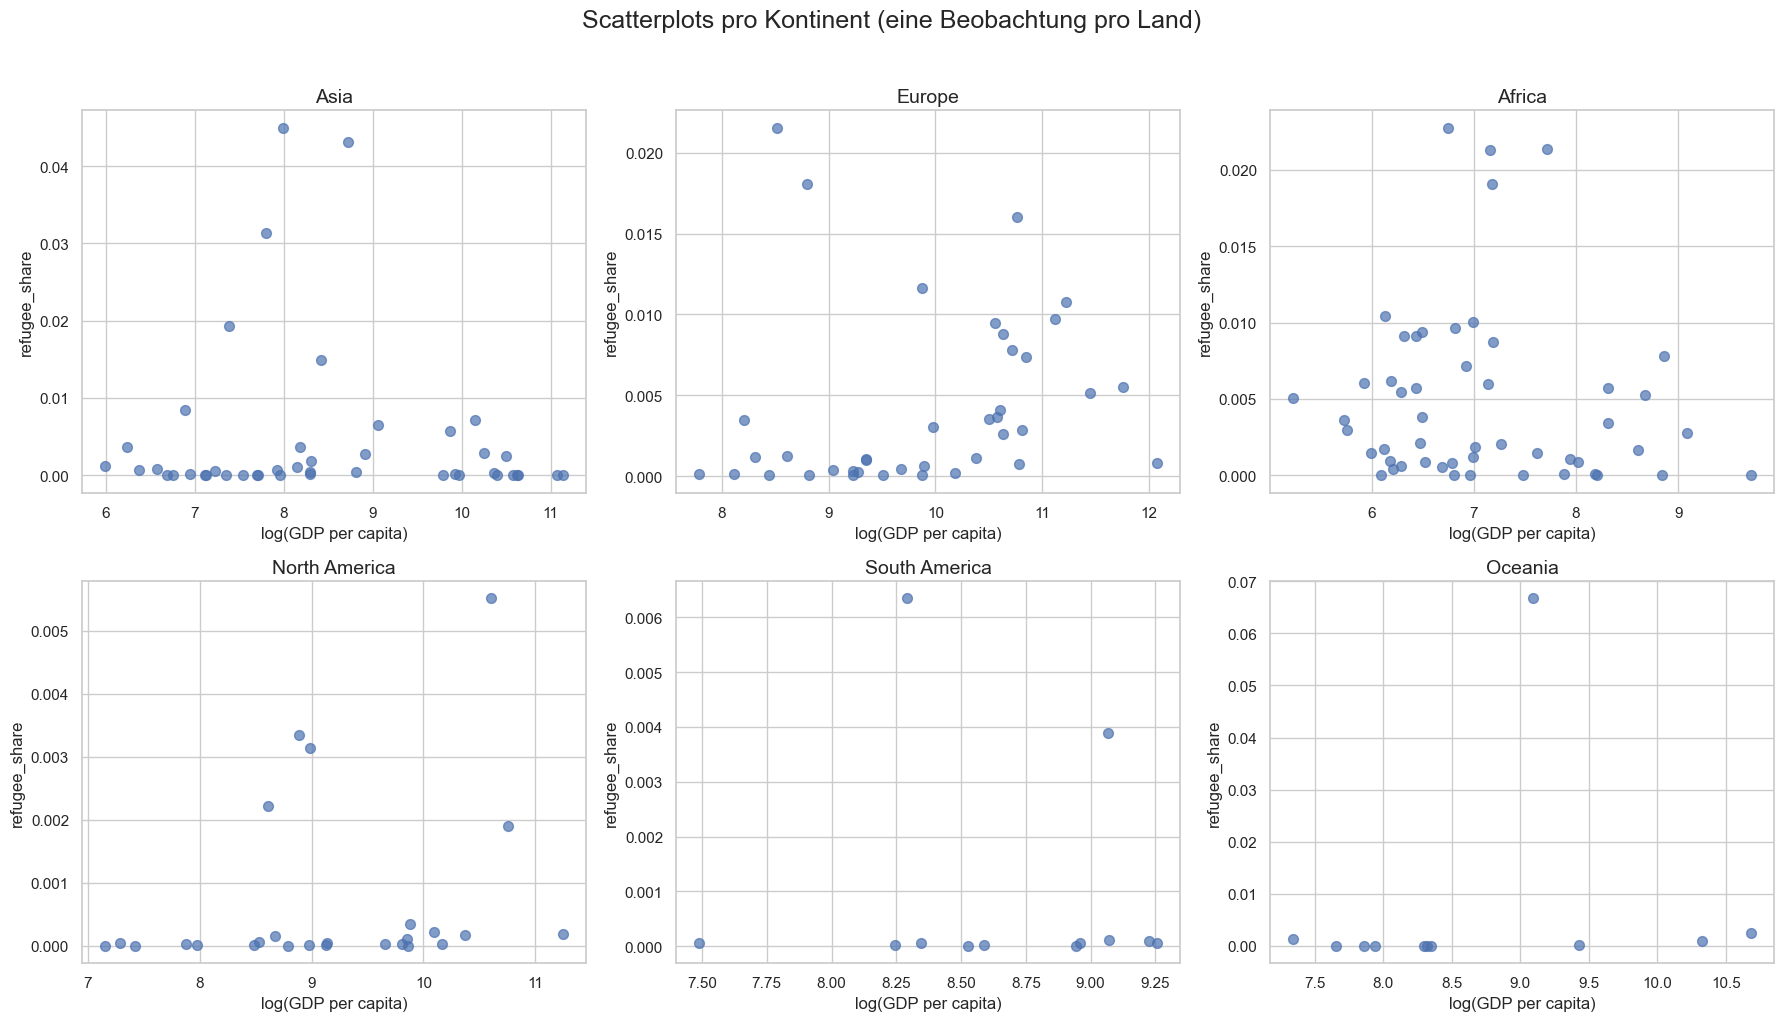

In [14]:
continents = df_country["continent"].unique()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, cont in enumerate(continents):
    ax = axes[i]
    sub = df_country[df_country["continent"] == cont]

    ax.scatter(
        sub["log_GDP"], 
        sub["refugee_share"],
        alpha=0.7,
        s=50
    )

    ax.set_title(cont, fontsize=14)
    ax.set_xlabel("log(GDP per capita)")
    ax.set_ylabel("refugee_share")

plt.suptitle("Scatterplots pro Kontinent (eine Beobachtung pro Land)", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


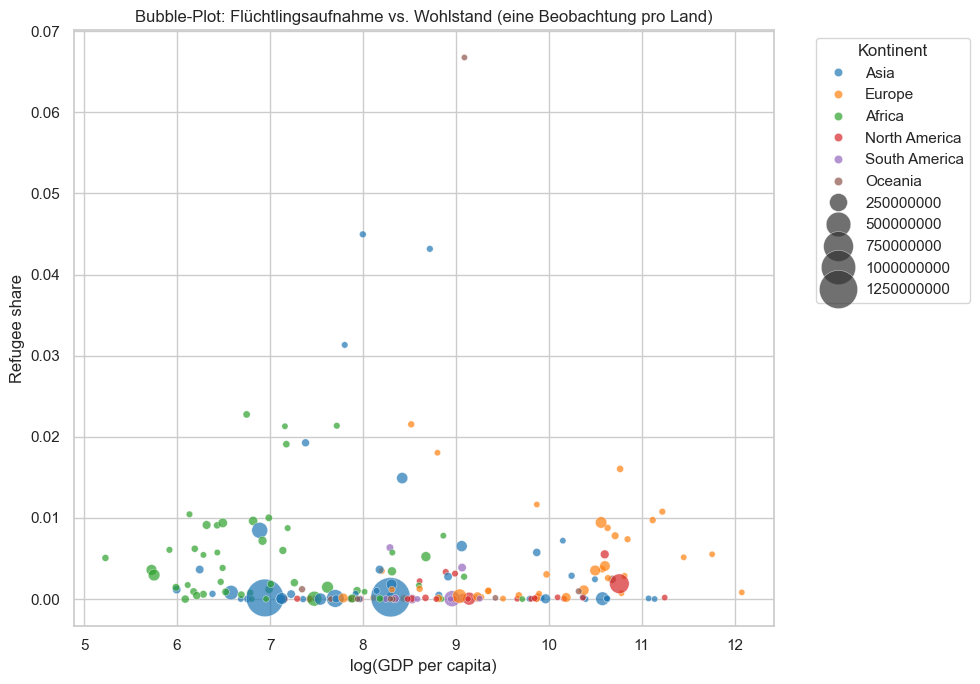

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,7))

sns.scatterplot(
    data=df_country,
    x="log_GDP",
    y="refugee_share",
    size=df_period.groupby("country")["Population"].mean().values,
    hue="continent",
    sizes=(20, 800),
    alpha=0.7,
    palette="tab10"
)

plt.title("Bubble-Plot: Flüchtlingsaufnahme vs. Wohlstand (eine Beobachtung pro Land)")
plt.xlabel("log(GDP per capita)")
plt.ylabel("Refugee share")
plt.legend(title="Kontinent", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

C:\Users\paulk\AppData\Local\Temp\ipykernel_76652\1176706361.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


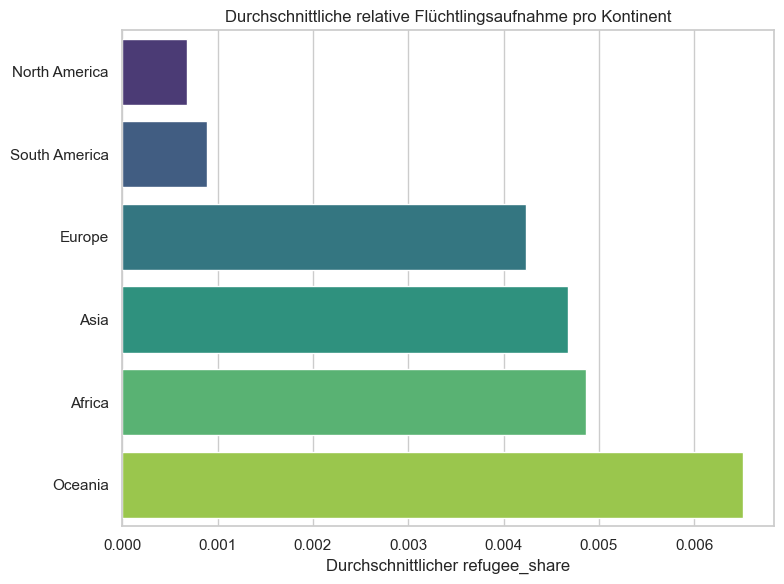

In [16]:
plt.figure(figsize=(8,6))

continent_means = df_country.groupby("continent")["refugee_share"].mean().sort_values()

sns.barplot(
    x=continent_means.values,
    y=continent_means.index,
    palette="viridis"
)

plt.title("Durchschnittliche relative Flüchtlingsaufnahme pro Kontinent")
plt.xlabel("Durchschnittlicher refugee_share")
plt.ylabel("")
plt.tight_layout()
plt.show()


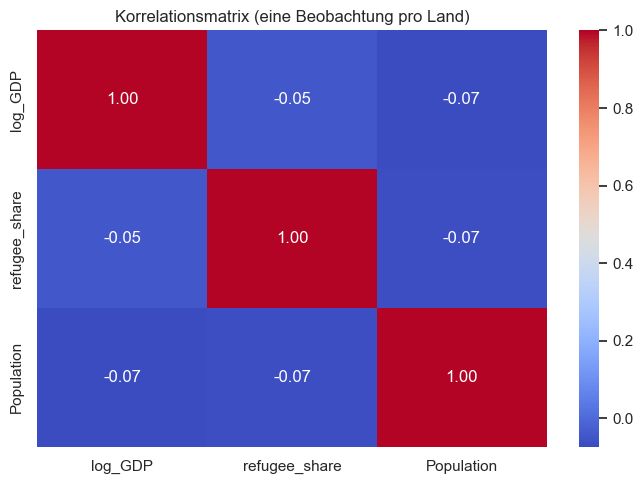

In [17]:
import numpy as np

df_corr = pd.DataFrame({
    "log_GDP": df_country["log_GDP"],
    "refugee_share": df_country["refugee_share"],
    "Population": df_period.groupby("country")["Population"].mean().values
})

plt.figure(figsize=(7,5))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix (eine Beobachtung pro Land)")
plt.tight_layout()
plt.show()


C:\Users\paulk\AppData\Local\Temp\ipykernel_76652\1783030960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


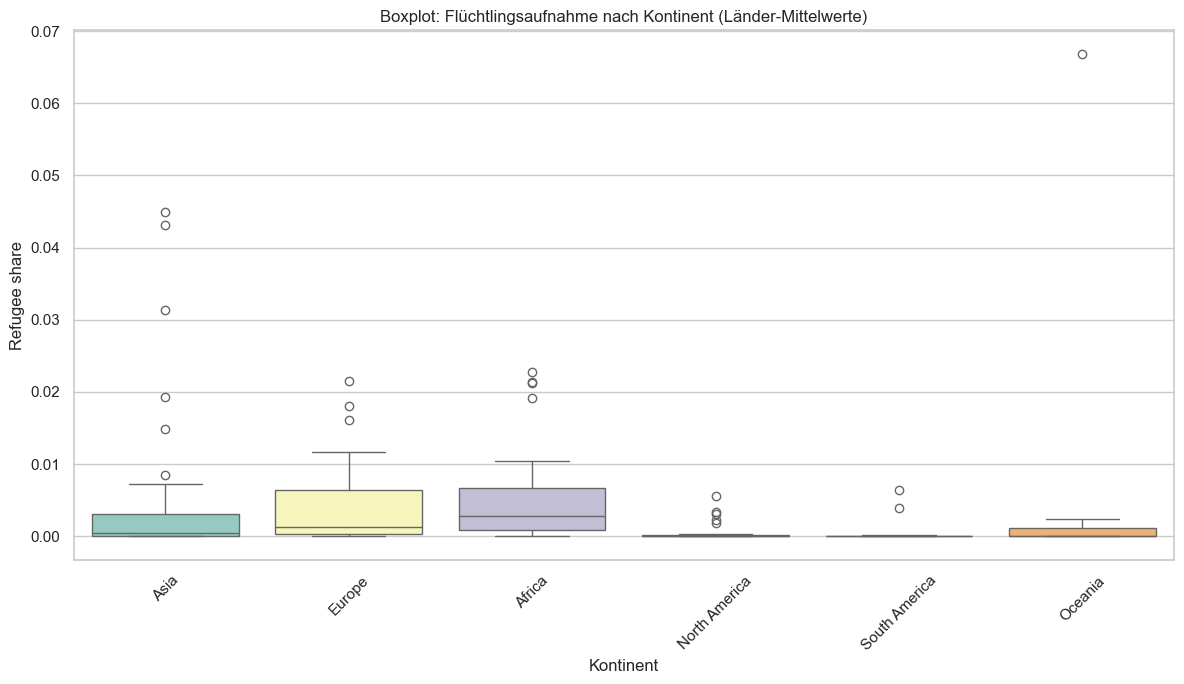

In [18]:
plt.figure(figsize=(12,7))

sns.boxplot(
    data=df_country,
    x="continent",
    y="refugee_share",
    palette="Set3"
)

plt.title("Boxplot: Flüchtlingsaufnahme nach Kontinent (Länder-Mittelwerte)")
plt.xlabel("Kontinent")
plt.ylabel("Refugee share")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
